In [1]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import myscripts
import random

In [2]:
random.seed(100)

Sequentielle de taille 1

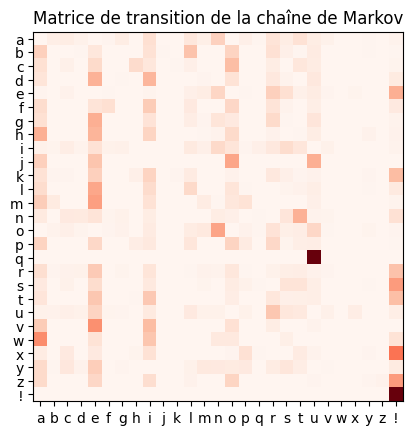

In [3]:
alphabet = myscripts.dico_alphabet()

PI, A = myscripts.apprentissage_markov([mot.replace("\n", "")+"!" for mot in open("dictionnaire.txt", "r").readlines()])

fig, ax = plt.subplots()
im = ax.imshow(A, cmap="Reds")
ax.set_xticks(np.arange(len(alphabet)), labels=alphabet.keys())
ax.set_yticks(np.arange(len(alphabet)), labels=alphabet.keys())

ax.set_title("Matrice de transition de la chaîne de Markov")

plt.show()
plt.close()

In [4]:
vprenom1 = myscripts.logvraisemblance_markov("arthur!", A, PI)
vprenom2 = myscripts.logvraisemblance_markov("louise!", A, PI)
vmotfr1 = myscripts.logvraisemblance_markov("abusif!", A, PI)
vmotfr2 = myscripts.logvraisemblance_markov("bouche!", A, PI)
vmotall = myscripts.logvraisemblance_markov("abfuhr!", A, PI)
aleamot = "".join([list(alphabet.keys())[random.randint(0, 25)] for _ in range(6)])
valea = myscripts.logvraisemblance_markov(aleamot, A, PI)

print(f"LogVraisemblance pour le prénom arthur: {vprenom1}")
print(f"LogVraisemblance pour le prénom louise: {vprenom2}")
print(f"LogVraisemblance pour le mot abusif: {vmotfr1}")
print(f"LogVraisemblance pour le mot bouche: {vmotfr1}")
print(f"LogVraisemblance pour le mot abfuhr: {vmotall}")
print(f"LogVraisemblance pour le mot {aleamot}: {valea}")

LogVraisemblance pour le prénom arthur: -18.57593611402376
LogVraisemblance pour le prénom louise: -15.754270139540562
LogVraisemblance pour le mot abusif: -19.703968400536525
LogVraisemblance pour le mot bouche: -19.703968400536525
LogVraisemblance pour le mot abfuhr: -42.899620836841805
LogVraisemblance pour le mot eooyfw: -66.2274491980265


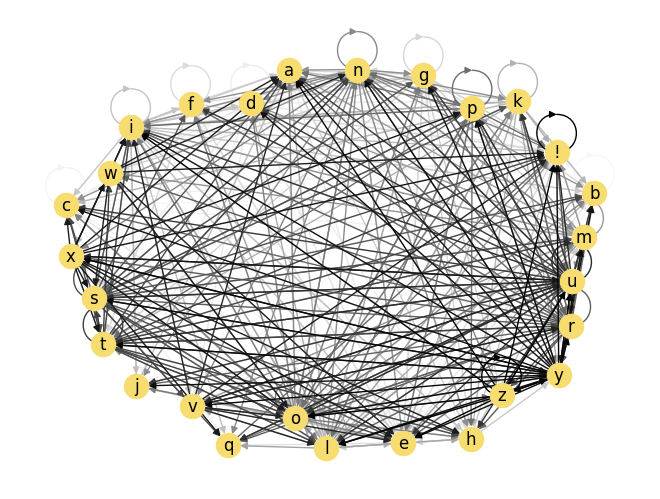

In [5]:
G = myscripts.graphe_markov(A)

nx.draw(G, pos=nx.spring_layout(G, k=15, seed=20),
                 edge_cmap=plt.cm.Greys, 
                 width=1, node_color="#f7dc6f", 
                 edge_color=range(len(G.edges())),
                 with_labels=True)

In [6]:
corpus = []
for _ in range(1000):
    mot = myscripts.generer(A, PI)
    logv = myscripts.logvraisemblance_markov(mot, A, PI)
    corpus.append((mot, logv))

categorie = myscripts.categoriser(corpus)

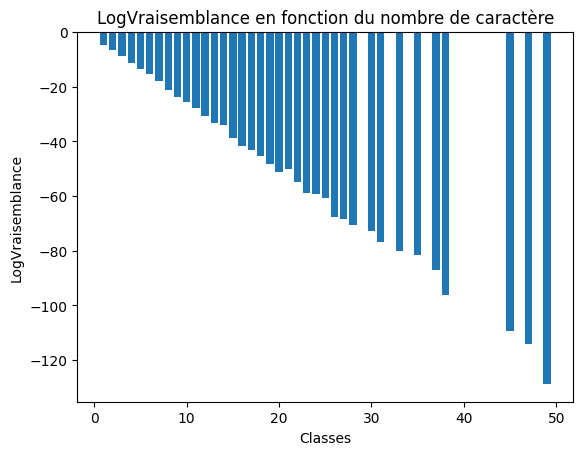

In [7]:
xLog = []
yLog = []

for i in categorie.keys():
    xLog.append(i)
    yLog.append((sum(categorie[i]["logvraisemblance"]))/len(categorie[i]["logvraisemblance"]))

plt.title("LogVraisemblance en fonction du nombre de caractère")
plt.bar(xLog, yLog)
plt.xlabel("Classes")
plt.ylabel("LogVraisemblance")
plt.show()
plt.close()

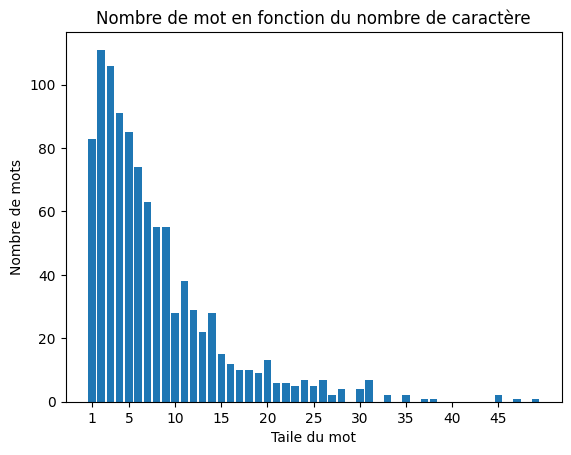

In [8]:
xTaille = []
yTaille = []

for i in categorie.keys():
    xTaille.append(i)
    yTaille.append(len(categorie[i]["mot"]))

plt.title("Nombre de mot en fonction du nombre de caractère")
plt.bar(xTaille, yTaille)
plt.xlabel("Taile du mot")
plt.ylabel("Nombre de mots")
plt.xticks([1] + [i for i in np.arange(min(xTaille)-1, max(xTaille)+1, 5.0) if i > 0])
plt.show()
plt.close()

K-mers

In [9]:
K2 = myscripts.dico_k_mers(2)
K5 = myscripts.dico_k_mers(5)

print(f"Alphabet de: {len(K2)} lettres pour K=2\nAlphabet de: {len(K5)} lettres pour K=5")

Alphabet de: 729 lettres pour K=2
Alphabet de: 14348907 lettres pour K=5


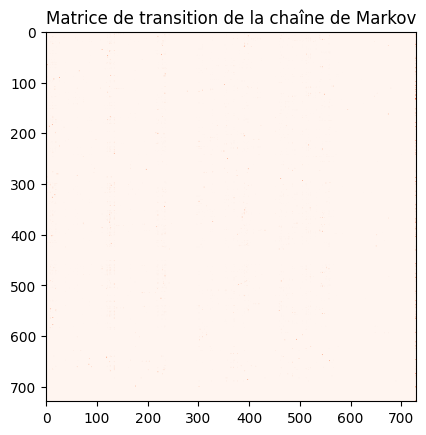

In [10]:
alphabetK2 = myscripts.dico_k_mers(2)

PIK2, AK2 = myscripts.apprentissage_markov_k_mers([mot.replace("\n", "")+"!" for mot in open("dictionnaire.txt", "r").readlines()], 2)

plt.imshow(AK2, cmap="Reds")
plt.title("Matrice de transition de la chaîne de Markov")
plt.show()
plt.close()

In [11]:
K2vprenom1 = myscripts.logvraisemblance_markov_k_mers("arthur!", AK2, PIK2, 2)
K2vprenom2 = myscripts.logvraisemblance_markov_k_mers("louise!", AK2, PIK2, 2)
K2vmotfr1 = myscripts.logvraisemblance_markov_k_mers("abusif!", AK2, PIK2, 2)
K2vmotfr2 = myscripts.logvraisemblance_markov_k_mers("bouche!", AK2, PIK2, 2)
K2vmotall = myscripts.logvraisemblance_markov_k_mers("abfuhr!", AK2, PIK2, 2)
K2valea = myscripts.logvraisemblance_markov_k_mers(aleamot, AK2, PIK2, 2)

print(f"LogVraisemblance pour le prénom arthur K=1: {vprenom1}, et pour K=2: {K2vprenom1}")
print(f"LogVraisemblance pour le prénom louise K=1: {vprenom2}, et pour K=2: {K2vprenom2}")
print(f"LogVraisemblance pour le mot abusif K=1: {vmotfr1}, et pour K=2: {K2vmotfr1}")
print(f"LogVraisemblance pour le mot bouche K=1: {vmotfr2}, et pour K=2: {K2vmotfr2}")
print(f"LogVraisemblance pour le mot abfuhr K=1: {vmotall}, et pour K=2: {K2vmotall}")
print(f"LogVraisemblance pour le mot {aleamot} K=1: {valea}, et pour K=2: {K2valea}")

LogVraisemblance pour le prénom arthur K=1: -18.57593611402376, et pour K=2: -34.216025285852346
LogVraisemblance pour le prénom louise K=1: -15.754270139540562, et pour K=2: -14.58397566565571
LogVraisemblance pour le mot abusif K=1: -19.703968400536525, et pour K=2: -14.588053066282859
LogVraisemblance pour le mot bouche K=1: -14.632781387457996, et pour K=2: -9.467334444075865
LogVraisemblance pour le mot abfuhr K=1: -42.899620836841805, et pour K=2: -73.94551058043709
LogVraisemblance pour le mot eooyfw K=1: -66.2274491980265, et pour K=2: -75.66922652183003


In [12]:
corpusK2 = []
for _ in range(1000):
    mot = myscripts.generer_k_mers(AK2, PIK2, 2)
    mot = mot[:mot.find("!")+1]
    logv = myscripts.logvraisemblance_markov_k_mers(mot, AK2, PIK2, 2)
    corpusK2.append((mot, logv))

categorieK2 = myscripts.categoriser(corpusK2)

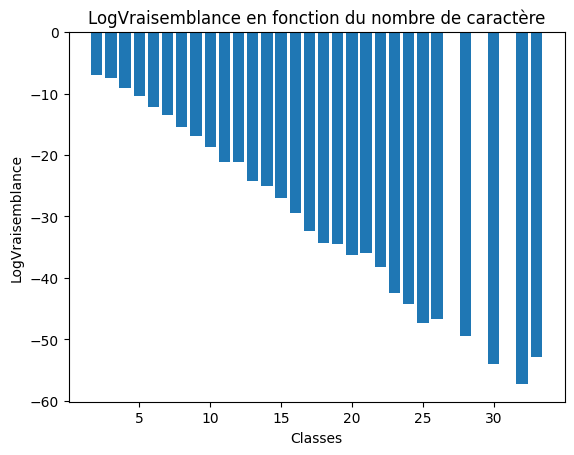

In [13]:
xK2Log = []
yK2Log = []

for i in categorieK2.keys():
    xK2Log.append(i)
    yK2Log.append((sum(categorieK2[i]["logvraisemblance"]))/len(categorieK2[i]["logvraisemblance"]))

plt.title("LogVraisemblance en fonction du nombre de caractère")
plt.bar(xK2Log, yK2Log)
plt.xlabel("Classes")
plt.ylabel("LogVraisemblance")
plt.show()
plt.close()

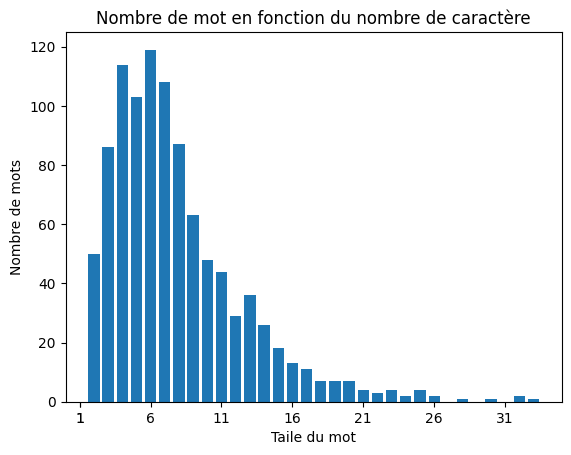

In [14]:
xK2Taille = []
yK2Taille = []

for i in categorieK2.keys():
    xK2Taille.append(i)
    yK2Taille.append(len(categorieK2[i]["mot"]))

plt.title("Nombre de mot en fonction du nombre de caractère")
plt.bar(xK2Taille, yK2Taille)
plt.xlabel("Taile du mot")
plt.ylabel("Nombre de mots")
plt.xticks([1] + [i for i in np.arange(min(xK2Taille)-1, max(xK2Taille)+1, 5.0) if i > 0])
plt.show()
plt.close()

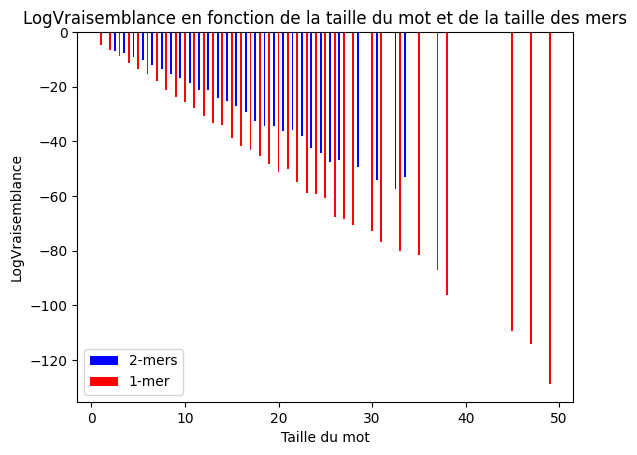

In [15]:
plt.bar([v+0.5 for v in xK2Log], yK2Log, color="blue", width=0.2, label="2-mers")
plt.bar(xLog, yLog, color="red", width=0.2, label="1-mer")

plt.legend()
plt.title('LogVraisemblance en fonction de la taille du mot et de la taille des mers')
plt.xlabel('Taille du mot')
plt.ylabel('LogVraisemblance')
plt.show()

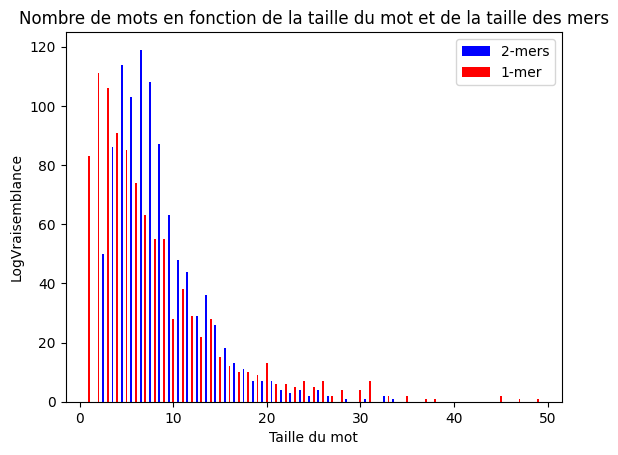

In [16]:
plt.bar([v+0.5 for v in xK2Taille], yK2Taille, color="blue", width=0.2, label="2-mers")
plt.bar(xTaille, yTaille, color="red", width=0.2, label="1-mer")

plt.legend()
plt.title('Nombre de mots en fonction de la taille du mot et de la taille des mers')
plt.xlabel('Taille du mot')
plt.ylabel('LogVraisemblance')
plt.show()

In [17]:
limite = 10
binf = 4
bsup = 8

print(f"Les \"\"\"meilleurs\"\"\" {limite} mots de taille {binf} à {bsup - 1} pour K=1 et K=2\n")

for i in range(binf, bsup):

    interet = set()
    interetK2 = set()

    MAX = sorted(categorie[i]["logvraisemblance"])[:limite]
    MAXK2 = sorted(categorieK2[i]["logvraisemblance"])[:limite]

    for indice, mot in enumerate(categorie[i]["mot"]):
        if categorie[i]["logvraisemblance"][indice] in MAX:
            interet.add(mot[:-1])
    
    for indice, mot in enumerate(categorieK2[i]["mot"]):
        if categorieK2[i]["logvraisemblance"][indice] in MAXK2:
            interetK2.add(mot[:-1])

    print(f"K=1: {" | ".join(interet)}")

    print(f"K=2: {" | ".join(interetK2)}\n")

Les """meilleurs""" 10 mots de taille 4 à 7 pour K=1 et K=2

K=1: muye | dafr | tino | prac | cinu | tied | hack | sake | frpe | tilz
K=2: rami | dili | assa | gazi | faub | arma | sint | boui | cory | lund

K=1: batea | abrdi | idicr | nirir | tomeu | moita | rtuts | iepll | demiu | pueni
K=2: annie | rachu | arbir | nocts | effin | noyau | menta | touru | nouet | adieu

K=1: tosppe | tyemal | syaiat | tasiti | vapurt | mevaco | minhan | ntirke | nonopr | tecasi
K=2: cieuri | ouerse | paprun | alsaou | ombeau | plosai | ancred | subiai | pichir | maniem

K=1: iartris | rverata | dspotio | bigoses | nsicule | teuschu | mapioun | flygttr | dicksus | sambuxe
K=2: actraud | saccino | bruneak | clurbit | natempe | spiculu | clisabe | sousino | annodes | inlaper



Significativité du gain de vraisemblance

Pour les mots de taille 4 à 8.

In [41]:
logVK, logVK2 = [], []

for i in range(4, 9):
    logVK += categorie[i]["logvraisemblance"]
    logVK2 += categorieK2[i]["logvraisemblance"]

logVK, logVK2 = logVK[:min(len(logVK), len(logVK2))], logVK2[:min(len(logVK), len(logVK2))]

alpha = 0.05

print("Différence significative entre K=1 et K=2 pour la vraisemblance des mots générés ?")
print(myscripts.student(logVK, logVK2, alpha))

Différence significative entre K=1 et K=2 pour la vraisemblance des mots générés ?
True
